EXERCICIO SOBRE TAXA DE RETORNO COMPARANDO A BASE FEITA POR MIM COM A BOVA

In [4]:
# RS = (preço final - preço inicial) / preço inicial
# Esse é o cálculo para uma ação. Para todas, deve-se considerar o pagamento à corretora e a taxa de câmbio

In [5]:
import pandas as pd
import numpy as np
import plotly.express as px

In [6]:
dataset = pd.read_csv('acoes_ex.csv')

In [7]:
dataset.shape

(2319, 7)

In [8]:
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,8.518181,37.820000,9.000000,11.325000,47.259998
1,2015-01-05,15.730000,8.745454,37.070000,8.270000,11.090000,46.320000
2,2015-01-06,16.330000,8.681818,36.150002,8.060000,11.245000,46.580002
3,2015-01-07,16.559999,8.809090,37.389999,8.450000,11.740000,48.150002
4,2015-01-08,16.540001,8.781818,38.910000,9.020000,11.780000,48.509998
...,...,...,...,...,...,...,...
2314,2024-04-24,12.040000,11.050000,47.900002,43.270000,27.500000,120.970001
2315,2024-04-25,12.020000,11.540000,47.689999,44.250000,27.379999,120.910004
2316,2024-04-26,12.010000,11.690000,48.000000,43.750000,27.379999,122.830002
2317,2024-04-29,12.100000,11.960000,47.930000,44.540001,27.549999,123.769997


TAXA DE RETORNO PARA CARTEIRA DE AÇÕES

In [9]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

<Axes: xlabel='Date'>

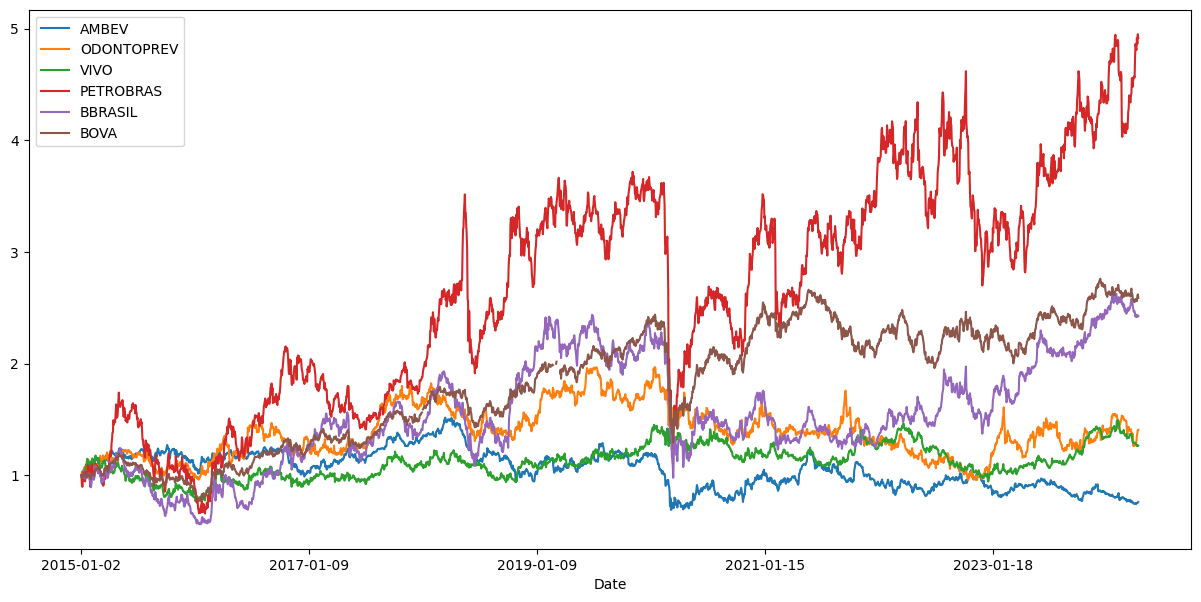

In [10]:
dataset_normalizado.plot(x = 'Date', figsize=(15,7))

In [11]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [12]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1


In [13]:
retorno_carteira.head()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.018102,0.026681,-0.019831,-0.081111,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.025393,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.048387,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.067456,0.003407,0.007477


In [14]:
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

AMBEV         0.005993
ODONTOPREV    0.086598
VIVO          0.065204
PETROBRAS     0.288679
BBRASIL       0.179130
BOVA          0.132347
dtype: float64

In [15]:
retorno_anual = retorno_anual * 100
retorno_anual

AMBEV          0.599331
ODONTOPREV     8.659762
VIVO           6.520430
PETROBRAS     28.867922
BBRASIL       17.912957
BOVA          13.234700
dtype: float64

In [16]:
# É PRECISO DEFINIR PESOS PARA CASA AÇAO DENTRO DA CARTEIRA
# FORAM CONSIDERADOS PESOS IGUAIS DE 0,2 PARA GOL ATÉ TOTS
# BOVA VAI SER COMPARADA COM A CARTEIRA GOL-CVC-WEGE-MGLU-TOTS-BOVA

In [17]:
pesos_carteira1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])
pesos_carteira1.sum()

1.0

In [18]:
# Fazendo multiplicação e soma
# Nota-se que é melhor investir no fundo do que na BOVA (É uma carteira montada pelas melhores empresas do Brasil)
np.dot(retorno_anual, pesos_carteira1)

12.512080187045758

In [19]:
pesos_carteira2 = np.array([0.1, 0.2, 0.2, 0.4, 0.1, 0.0])
pesos_carteira2.sum()

1.0

In [20]:
np.dot(retorno_anual, pesos_carteira2)

16.434435818196064

GRÁFICO DA CARTEIRA X BOVA

In [21]:
dataset_normalizado = dataset.copy()
for i in dataset_normalizado.columns[1:]:
    dataset_normalizado[i] = (dataset_normalizado[i] / dataset_normalizado[i][0])

In [22]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['AMBEV'] + dataset_normalizado['ODONTOPREV'] + dataset_normalizado['VIVO'] + dataset_normalizado['PETROBRAS'] + dataset_normalizado['BBRASIL']) / 5

In [23]:
dataset_normalizado

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA,CARTEIRA
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.918889,0.979249,0.980110,0.977377
2,2015-01-06,1.019351,1.019210,0.955844,0.895556,0.992936,0.985612,0.976579
3,2015-01-07,1.033708,1.034152,0.988630,0.938889,1.036645,1.018832,1.006405
4,2015-01-08,1.032459,1.030950,1.028821,1.002222,1.040177,1.026449,1.026926
...,...,...,...,...,...,...,...,...
2314,2024-04-24,0.751561,1.297225,1.266526,4.807778,2.428256,2.559670,2.110269
2315,2024-04-25,0.750312,1.354749,1.260973,4.916667,2.417660,2.558401,2.140072
2316,2024-04-26,0.749688,1.372359,1.269170,4.861111,2.417660,2.599027,2.133997
2317,2024-04-29,0.755306,1.404056,1.267319,4.948889,2.432671,2.618917,2.161648


In [24]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()


####################
# Nota-se a carteira melhor que a BOVA

In [25]:
dataset_normalizado.drop(labels=['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL'], axis=1, inplace=True)

In [26]:
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
    figura.add_scatter(x = dataset_normalizado['Date'], y = dataset_normalizado[i], name = i)
figura.show()

##################################################
# ATÉ DIA 30/04/2024, A CARTEIRA ESTÁ PERDENDO PARA A BOVA